In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway

In [3]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data['species'] = iris.target_names[iris.target]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Dataset Overview
print("Dataset shape:", data.shape)
print("Features:", data.columns[:-1])
print("Target variable:", data.columns[-1])
print(data.head())


Dataset shape: (150, 5)
Features: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Target variable: species
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
# Univariate Analysis
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


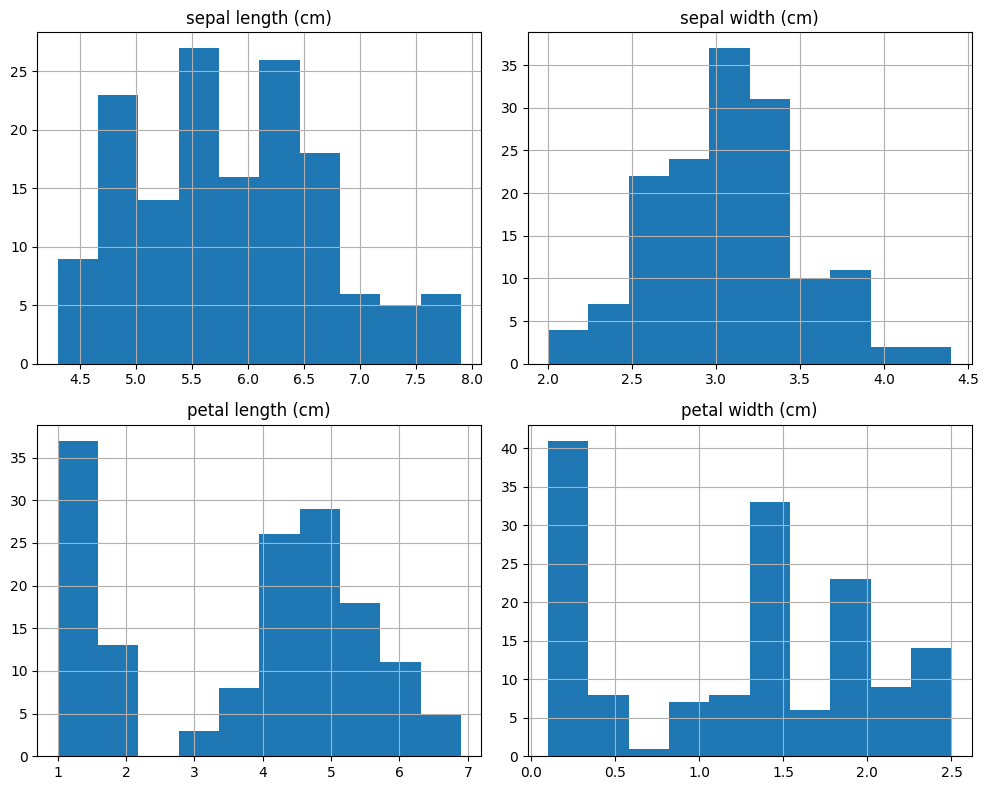

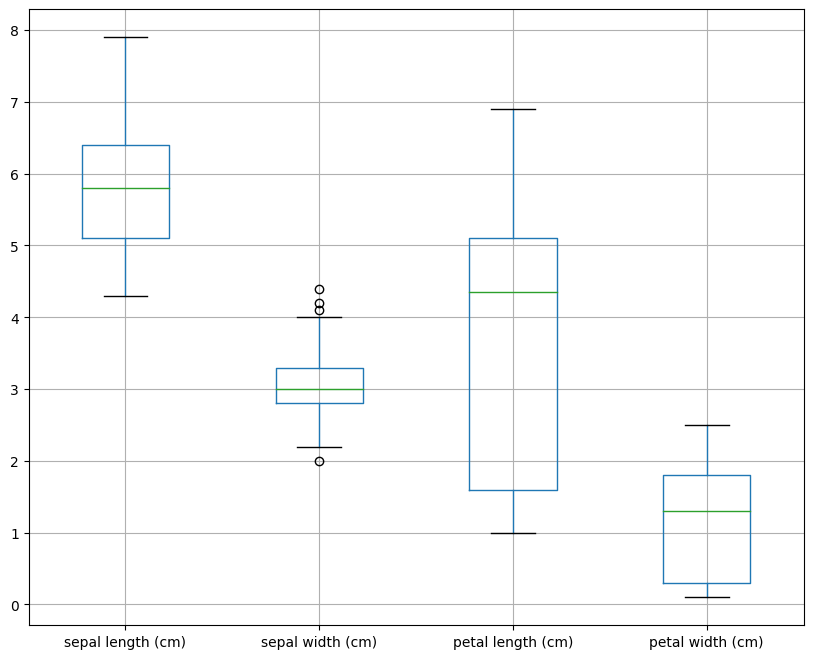

Missing values: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [8]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()
data.boxplot(figsize=(10, 8))
plt.show()
print("Missing values:", data.isnull().sum())

In [ ]:
data.iloc[:, :-1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


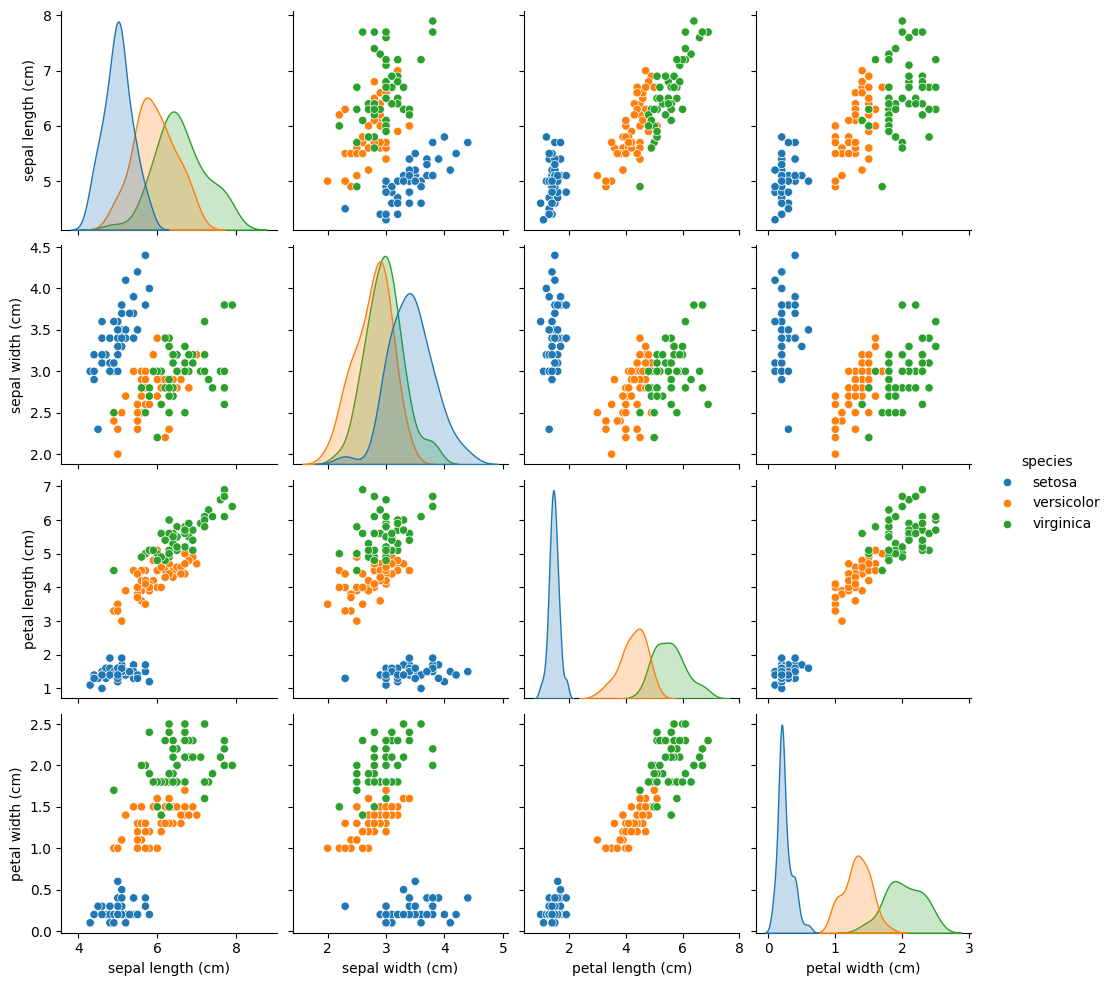

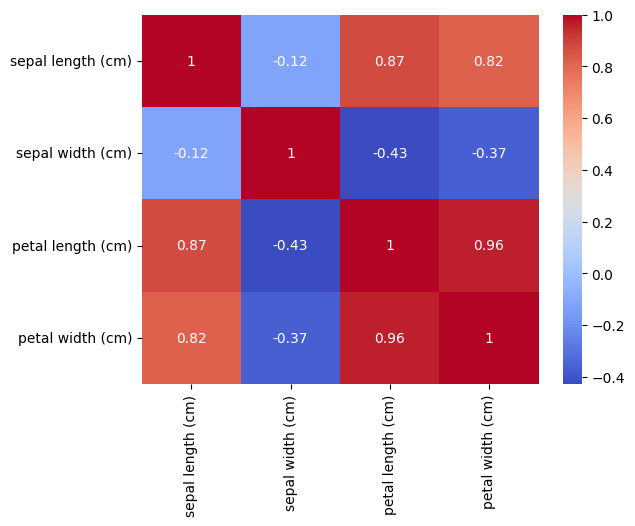

In [ ]:
# Bivariate Analysis
sns.pairplot(data, hue='species')
plt.show()
corr_matrix = data.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

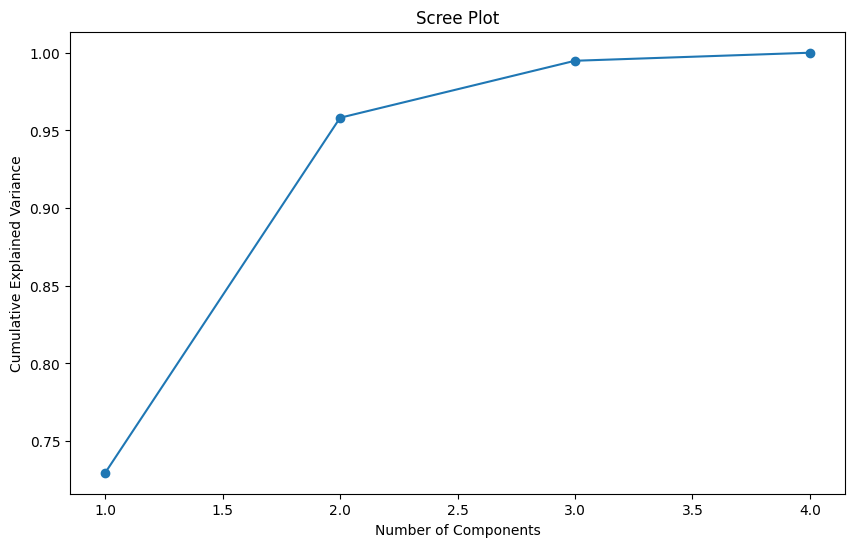

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


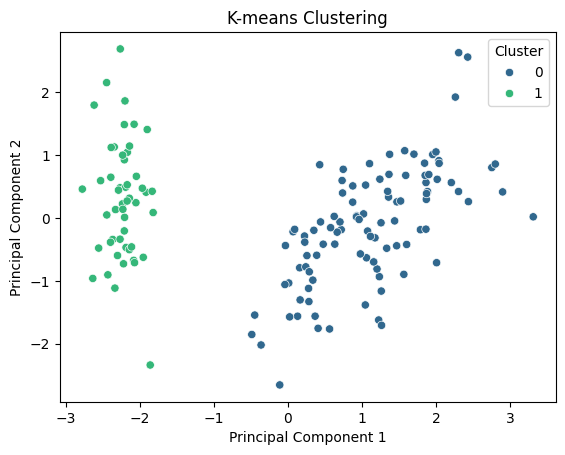

In [9]:
# Multivariate Analysis
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


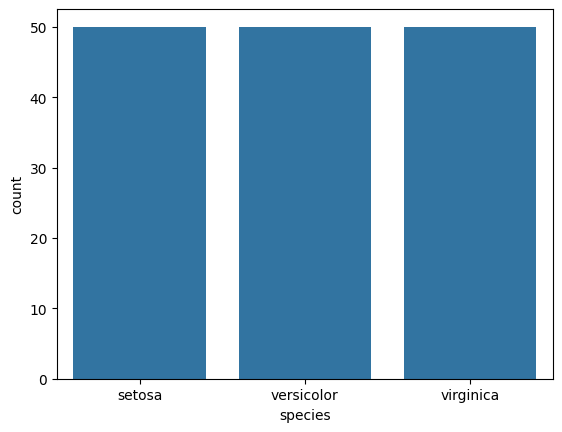

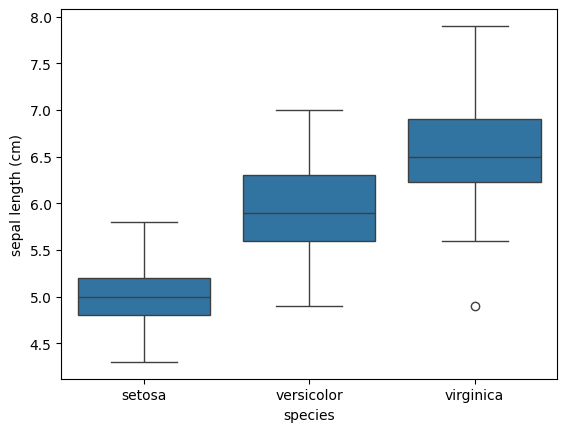

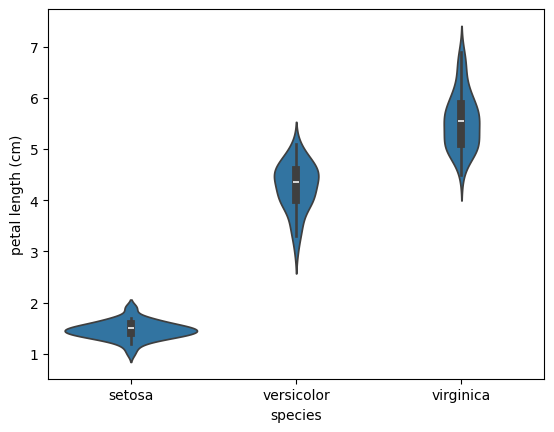

In [ ]:
# Target Variable Analysis
print(data['species'].value_counts())
sns.countplot(x='species', data=data)
plt.show()
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.show()
sns.violinplot(x='species', y='petal length (cm)', data=data)
plt.show()

In [ ]:
# Feature Importance
for feature in data.columns[:-2]:
    groups = [data[data['species'] == species][feature] for species in data['species'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"Feature: {feature}")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"p-value: {p_value:.5f}")
    print()

Feature: sepal length (cm)
F-statistic: 119.26
p-value: 0.00000

Feature: sepal width (cm)
F-statistic: 49.16
p-value: 0.00000

Feature: petal length (cm)
F-statistic: 1180.16
p-value: 0.00000

Feature: petal width (cm)
F-statistic: 960.01
p-value: 0.00000



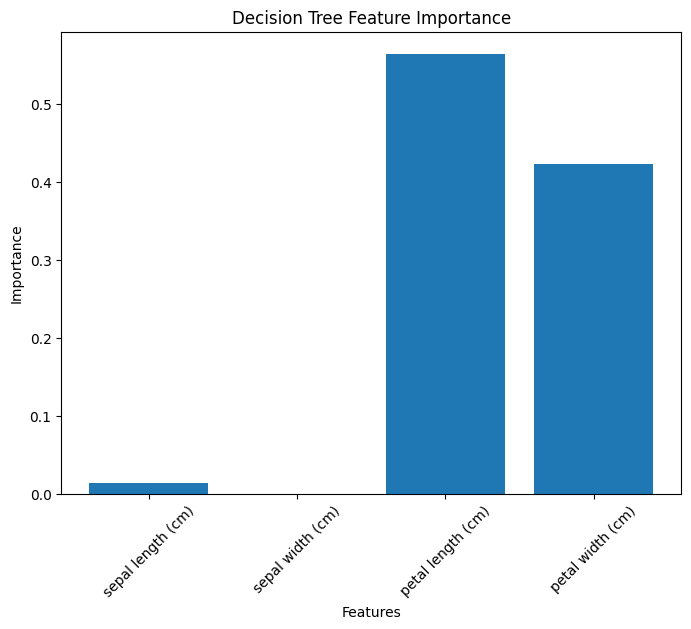

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, y)
importances = dt_classifier.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

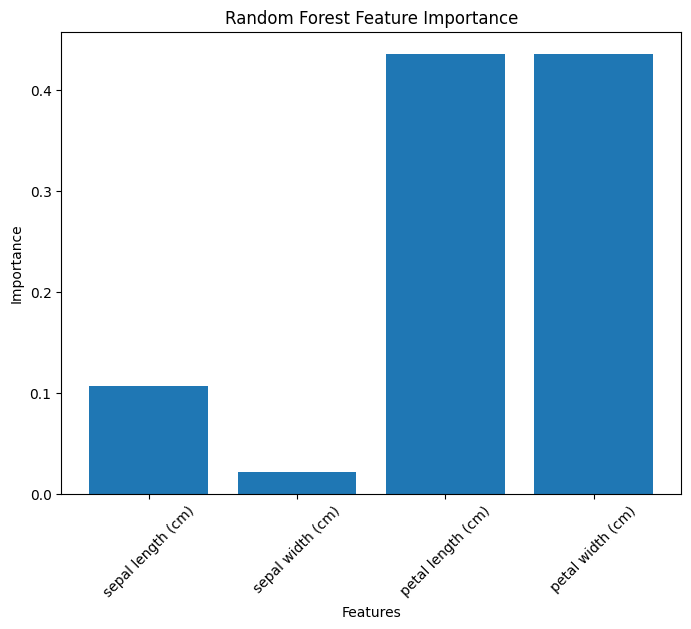

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
importances = rf_classifier.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()